In [2]:
%config IPCompleter.greedy=True

In [14]:
import tensorflow as tf
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.contrib.keras.api.keras.datasets import cifar10
from tensorflow.contrib.keras.api.keras.optimizers import SGD
from tensorflow.contrib.keras.api.keras.utils import to_categorical
from tensorflow.contrib.keras.api.keras.models import model_from_json
from tensorflow.contrib.keras.api.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [4]:
batch_size = 32
n_classes = 10
epochs = 40

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
height = x_train.shape[1]
width = x_train.shape[2]

In [7]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

In [8]:
print('Training dataset: ', x_train.shape, y_train.shape)
print('Validation dataset: ', x_val.shape, y_val.shape)
print('Test dataset: ', x_test.shape, y_test.shape)

Training dataset:  (45000, 32, 32, 3) (45000, 1)
Validation dataset:  (5000, 32, 32, 3) (5000, 1)
Test dataset:  (10000, 32, 32, 3) (10000, 1)


In [9]:
def plot(data, answer, text):
    cols=2
    fig = plt.figure()
    label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    print(text)
    for i in range(5):
        a = fig.add_subplot(cols, np.ceil(n_classes/float(cols)), i + 1)
        #img_num = np.random.randint(data.shape[0])
        image = data[i]
        id = answer[i]
        plt.imshow(image)
        a.set_title(label_names[id[0]])
    fig.set_size_inches(8,8)
    plt.show()


training:


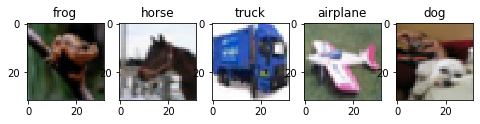

validation:


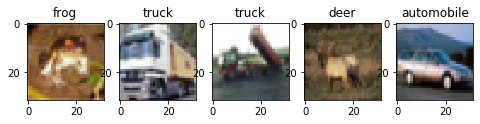

test:


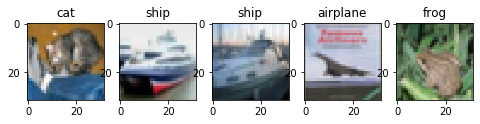

In [10]:
plot(x_train, y_train, 'training:')
plot(x_val, y_val, 'validation:')
plot(x_test, y_test, 'test:')

In [11]:
# Convert labels to categorical
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
y_test = to_categorical(y_test, n_classes)

In [12]:
# Datasets pre-processing
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

In [21]:
def optimizer():
    return SGD(lr=1e-2)

In [13]:
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(height, width, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    return model

model = create_model()
model.compile(optimizer=optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val),verbose=1)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 45000 samples, validate on 5000 samples
Epoch 1/40
45000/45000 [==============================] - 202s 4ms/sample - loss: 2.1765 - acc: 0.1784 - val_loss: 1.9748 - val_acc: 0.2516
Epoch 2/40
45000/45000 [==============================] - 195s 4ms/sample - loss: 1.8930 - acc: 0.2964 - val_loss: 1.7691 - val_acc: 0.3342
Epoch 3/40
45000/45000 [==============================] - 182s 4ms/sample - loss: 1.6921 - acc: 0.3735 - val_loss: 1.9135 - val_acc: 0.3096
Epoch 4/40
45000/45000 [==============================] - 183s 4ms/sample - loss: 1.5544 - acc: 0.4278 - val_loss: 1.7558 - val_acc: 0.3542
Epoch 5/40
45000/45000 [==============================] - 183s 4ms/sample - loss: 1.4465 - acc: 0.4688 - val_loss: 1.3493 - val_acc: 0.5048
Epoch 6/40
45000/45000 [==============================] - 183s 4ms/sample - loss: 1.3597 - acc: 0.5056 - val_loss: 1.3363 - val_acc: 

In [18]:
def save_model(model):
    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

In [16]:
# load json and create model
def load_model():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    return loaded_model


In [22]:
model = load_model()
model.compile(optimizer=optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

Loaded model from disk


In [17]:
save_model()

Saved model to disk


In [23]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100), "| Loss: %.5f" % (scores[0]))

Accuracy: 76.09% | Loss: 0.70540


In [26]:
result = model.predict(x_val)

(5000, 10)